### Pytorch workflow tests

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.1.2+cu118'

### Dummy regression data

In [2]:
weight = 3.2
bias = 1.9

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = X*weight + bias

In [3]:
X, y

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800],
         [0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[1.9000],
         [1.9640],
         [

In [4]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [5]:
len(X_train), len(y_test)

(40, 10)

In [6]:
def plot_data(train_data, train_y, test_data, test_y, preds=None):
    plt.figure(figsize=(10,7))
    
    plt.scatter(train_data, train_y, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_y, c="r", s=4, label="Test data")
    if preds is not None:
        plt.scatter(test_data, preds, c="g", s=4, label="Preds")
    plt.legend()

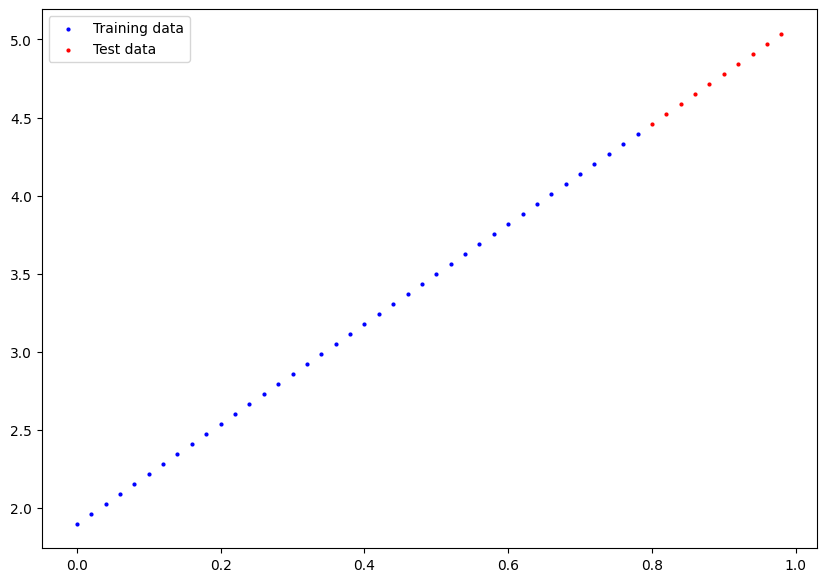

In [7]:
plot_data(X_train, y_train, X_test, y_test)

### Linear regression model
pytorch works using classes, usually inheriting from the torch.nn.Module class

In [8]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    # forward computation model in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias # a linear regression problem / function
        

In [9]:
model_0 = LinearRegressionModel()

In [10]:
# list(model_0.parameters())
model_0.state_dict()

OrderedDict([('weights', tensor([-1.5694])), ('bias', tensor([-0.7134]))])

#### Make predictions using torch.inference_mode()
to do that the model will pass the inputs through it's forward method

In [11]:
with torch.inference_mode():
    init_preds = model_0(X_test)
init_preds

tensor([[-1.9689],
        [-2.0003],
        [-2.0317],
        [-2.0631],
        [-2.0945],
        [-2.1259],
        [-2.1572],
        [-2.1886],
        [-2.2200],
        [-2.2514]])

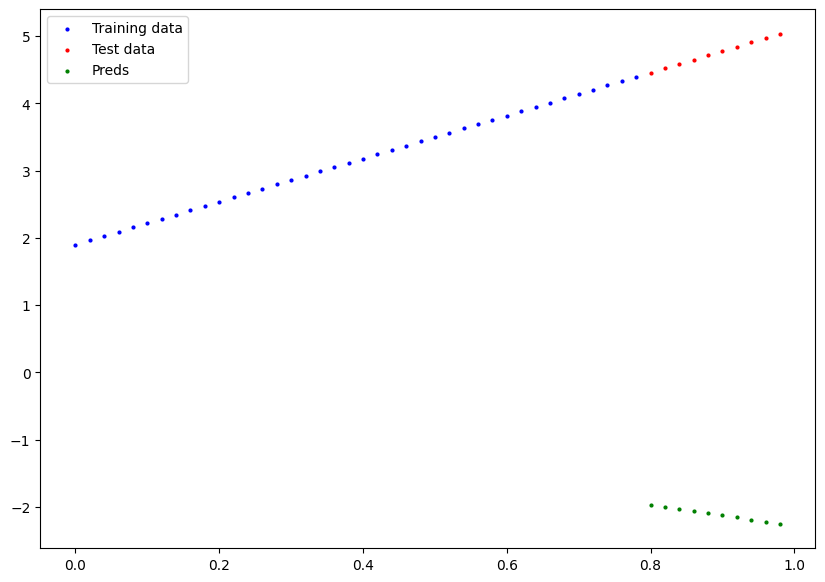

In [12]:
plot_data(X_train, y_train, X_test, y_test, preds = init_preds)

#### Losses and optimizers

In [13]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_0.parameters(),
                           lr=0.1)

#### Training loop

In [14]:
epochs = 200

# track stats from experiments
epoch_count = []
loss_values = []
test_loss_values = []

# loop through the data
for epoch in range(epochs):
    # turns on gradient tracking
    model_0.train()

    # forward pass
    y_pred = model_0(X_train)

    # calc loss
    loss = loss_fn(y_pred, y_train)
    # print(loss)

    # optimizer zero grad
    # ? because optimizers accumulate
    optimizer.zero_grad()

    # loss backwards / backpropagation
    loss.backward()

    # optimizer step (perform gradient descent)
    optimizer.step()

    ### testing
    # turns off gradient tracking
    model_0.eval()

    # forward pass
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch}, loss: {loss}, test_loss: {test_loss}")
    

Epoch: 0, loss: 4.4734625816345215, test_loss: 6.723448276519775
Epoch: 10, loss: 3.321362257003784, test_loss: 5.37634801864624
Epoch: 20, loss: 2.169262170791626, test_loss: 4.029248237609863
Epoch: 30, loss: 1.1119482517242432, test_loss: 2.753927707672119
Epoch: 40, loss: 0.7113434672355652, test_loss: 1.967484712600708
Epoch: 50, loss: 0.6019226908683777, test_loss: 1.566351294517517
Epoch: 60, loss: 0.5548982620239258, test_loss: 1.354895830154419
Epoch: 70, loss: 0.5191184282302856, test_loss: 1.2379167079925537
Epoch: 80, loss: 0.48421841859817505, test_loss: 1.1277177333831787
Epoch: 90, loss: 0.44980964064598083, test_loss: 1.0449943542480469
Epoch: 100, loss: 0.4154422879219055, test_loss: 0.9622709155082703
Epoch: 110, loss: 0.38107460737228394, test_loss: 0.8864163160324097
Epoch: 120, loss: 0.3467901349067688, test_loss: 0.8036929965019226
Epoch: 130, loss: 0.31240615248680115, test_loss: 0.7209694981575012
Epoch: 140, loss: 0.2780551016330719, test_loss: 0.64511483907699

In [15]:
model_0.state_dict()

OrderedDict([('weights', tensor([2.8424])), ('bias', tensor([2.0516]))])

In [16]:
with torch.inference_mode():
    init_preds = model_0(X_test)
init_preds

tensor([[4.3255],
        [4.3824],
        [4.4392],
        [4.4961],
        [4.5529],
        [4.6098],
        [4.6666],
        [4.7235],
        [4.7803],
        [4.8371]])

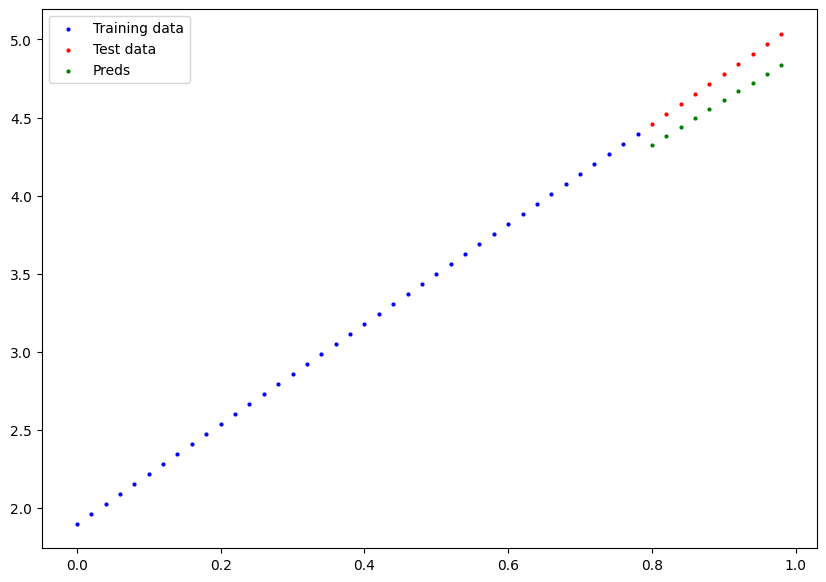

In [17]:
plot_data(X_train, y_train, X_test, y_test, preds = init_preds)

In [22]:
import numpy as np
loss_values = np.array(torch.tensor(loss_values).numpy())
test_loss_values = np.array(torch.tensor(test_loss_values).numpy())

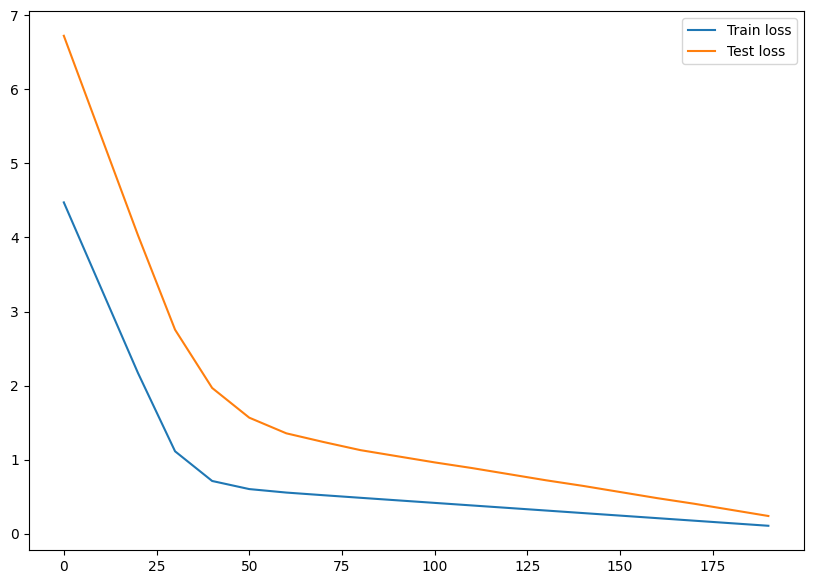

In [23]:
plt.figure(figsize=(10,7))
plt.plot(epoch_count, loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.legend()

#### Saving a model
could be done by just saving it's state dict (weights, biases etc)

In [25]:
MODEL_PATH = './models/'
MODEL_NAME = '01_pytorch_workflow_model_0.pth'

MODEL_SAVE_PATH = MODEL_PATH + MODEL_NAME
MODEL_SAVE_PATH

'./models/01_pytorch_workflow_model_0.pth'

In [26]:
torch.save(model_0.state_dict(), MODEL_SAVE_PATH)

#### But if you save only the state_dict, you will need to create a new model instance of the same structure before loading in the state dict

In [29]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([2.8424])), ('bias', tensor([2.0516]))])

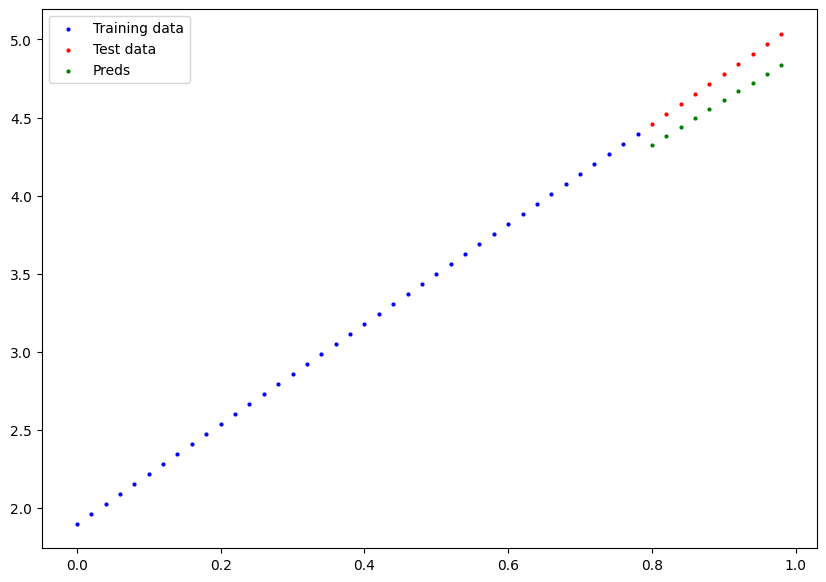

In [31]:
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)
plot_data(X_train, y_train, X_test, y_test, loaded_model_preds)